<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-6830-1658839462/blob/main/Sangeetha_Ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build CNN model for classification of Flowers**

# **2. Image Augmentation**

# **1.Download the dataset**

In [ ]:


import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)

# **3.Create a model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model = Sequential()

In [ ]:
#unzip the dataset
!unzip Flowers-Dataset.zip 

# **Add layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)**

In [ ]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300, activation = "relu"))
model.add(Dense(150, activation = "relu")) #mulitple dense layers
model.add(Dense(5, activation = "softmax")) #output layer

In [ ]:

num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# **Compile The Model**

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#**Fit The Model** 

In [ ]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 31s 684ms/step - loss: 1.7914 - accuracy: 0.3588
Epoch 2/15
44/44 [==============================] - 29s 648ms/step - loss: 1.1730 - accuracy: 0.5045
Epoch 3/15
44/44 [==============================] - 29s 650ms/step - loss: 1.0967 - accuracy: 0.5529
Epoch 4/15
44/44 [==============================] - 29s 648ms/step - loss: 1.0351 - accuracy: 0.5939
Epoch 5/15
44/44 [==============================] - 29s 645ms/step - loss: 0.9920 - accuracy: 0.6127
Epoch 6/15
44/44 [==============================] - 30s 677ms/step - loss: 0.9659 - accuracy: 0.6259
Epoch 7/15
44/44 [==============================] - 29s 648ms/step - loss: 0.9129 - accuracy: 0.6426
Epoch 8/15
44/44 [==============================] - 29s 647ms/step - loss: 0.9085 - accuracy: 0.6433
Epoch 9/15
44/44 [==============================] - 32s 717ms/step - loss: 0.8597 - accuracy: 0.6620
Epoch 10/15
44/44 [==============================] - 30s 674ms/step - loss: 0.8350 - accura

# **Save The Model**

In [ ]:
model.save("flowers.m5")#another model to show the accuracy

# **Test The Model**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model("/content/flowers.h1")

In [ ]:
#Testing with a random rose image from Google

img = image.load_img("/content/rose.gif", target_size = (64,64) )

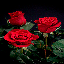

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x.ndim

3

In [ ]:
x = np.expand_dims(x,axis = 0)
x.ndim

4

In [ ]:
pred = model.predict(x)
pred

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']

In [ ]:
labels[np.argmax(pred)]

'roses'